If you run into this error:
> ---------------------------------------------------------------------------
``` ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-2-a825e4b73726> in <cell line: 9>()
      7 import seaborn as sns
      8
----> 9 from pycaret.clustering import *
     10 from sklearn.cluster import KMeans
     11 from sklearn.metrics import silhouette_score
ModuleNotFoundError: No module named 'pycaret'

**Go to runtime then restart the kernel. It should work.**

# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
# Install or upgrade required libraries
!pip install pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Mounted at /content/drive


In [3]:
region=12
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
6056,3544554,Tandawan,New Bataan,Davao de Oro (Compostela Valley),0.185232,1.166851,0.444704,1.0,0,1,1,3544547,11.869314,23.766912,17.938302,225.509478,105.513517,49.443421,44.209797,0.649307
56,3434049,Colonsabak,Matanao,Davao del Sur,0.112599,0.667534,1.043517,1.0,0,1,1,3481009,67.329302,2.140404,0.430182,13.797210,6.893358,3.347004,3.000762,0.641621


In [4]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## train

In [5]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3428519
1,3429892
2,3429893
3,3429894
4,3429897
...,...
8537,3594317
8538,3594318
8539,3595697
8540,3595698


In [6]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(8542, 1)"
2,Transformed data shape,"(8542, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


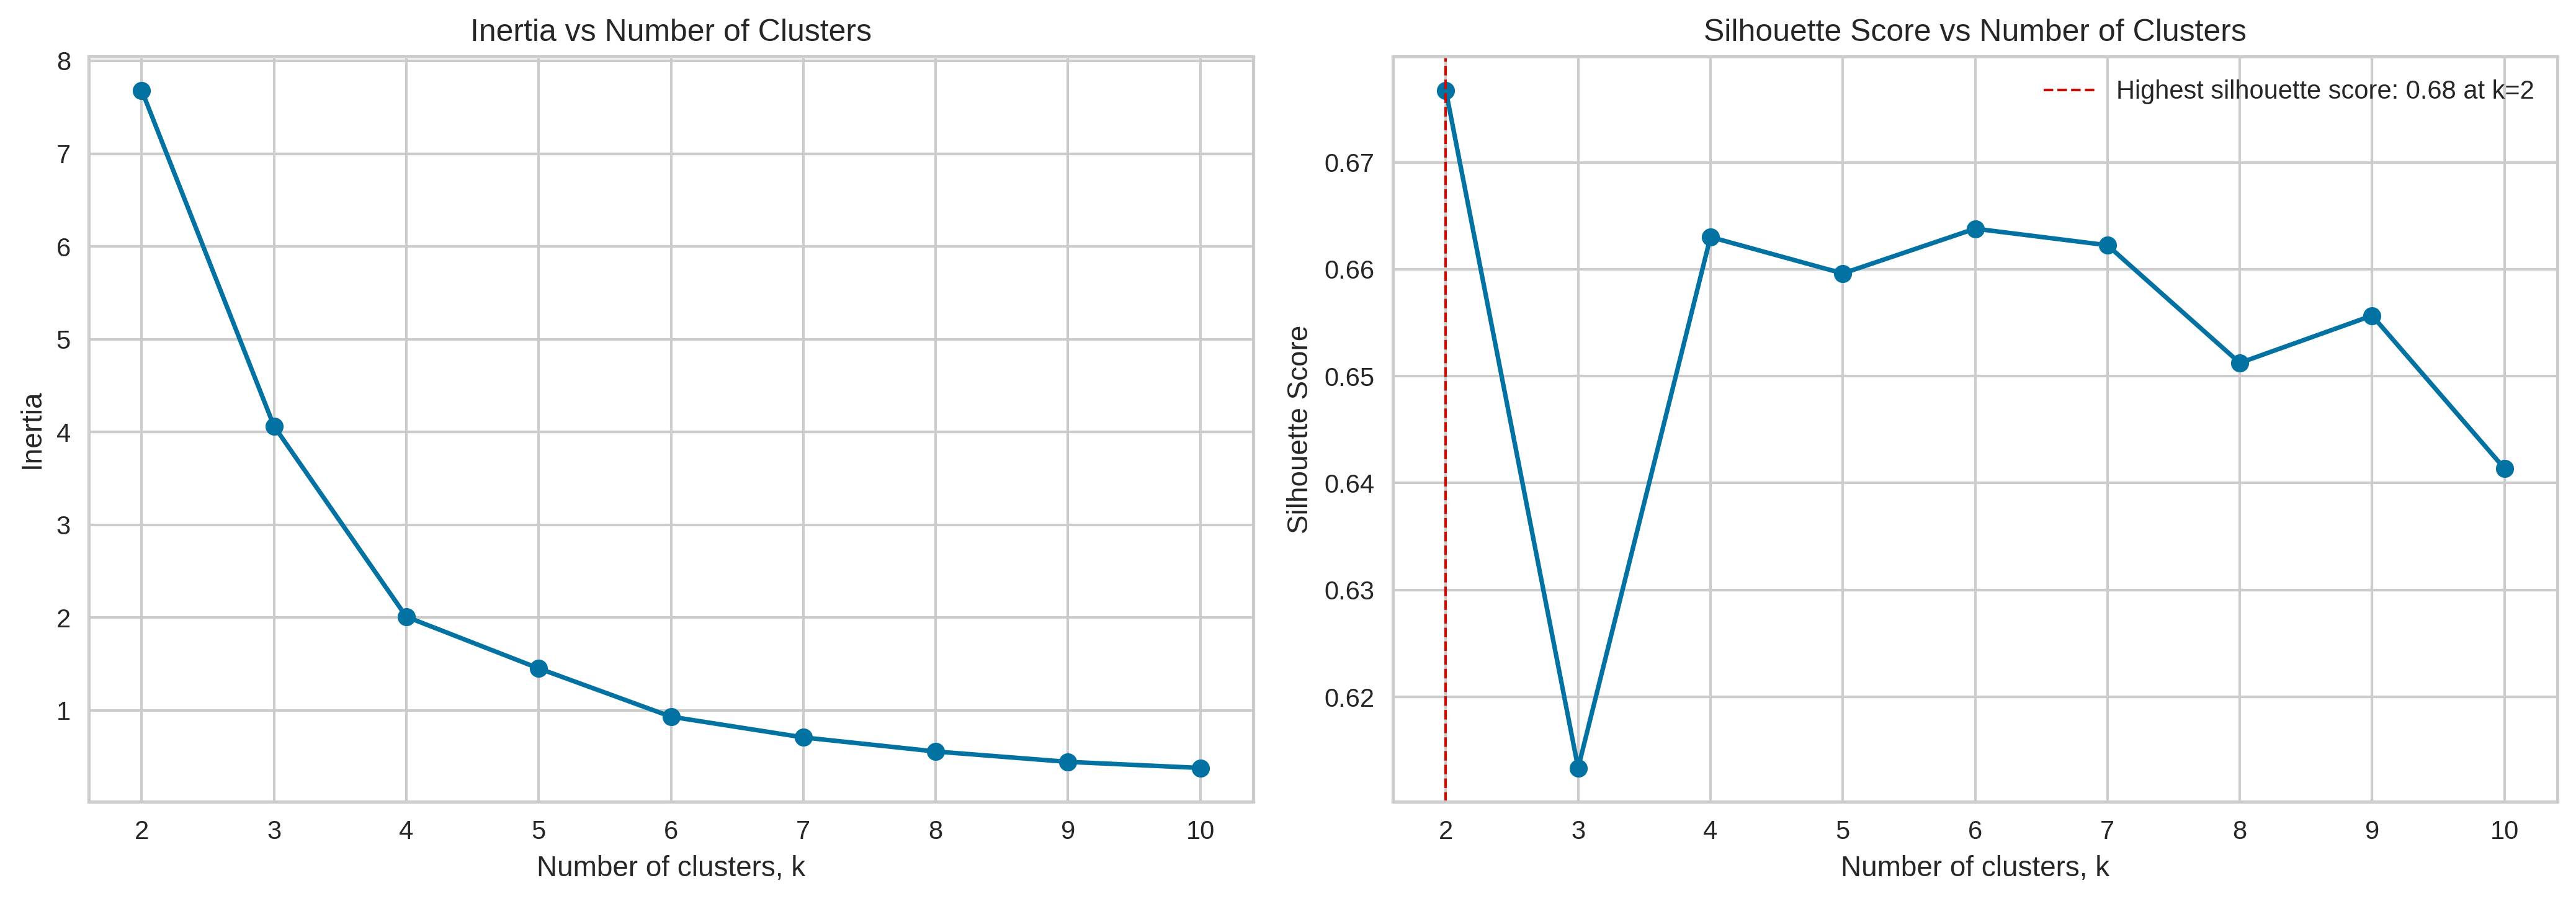

In [7]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6630,31821.8274,0.4529,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

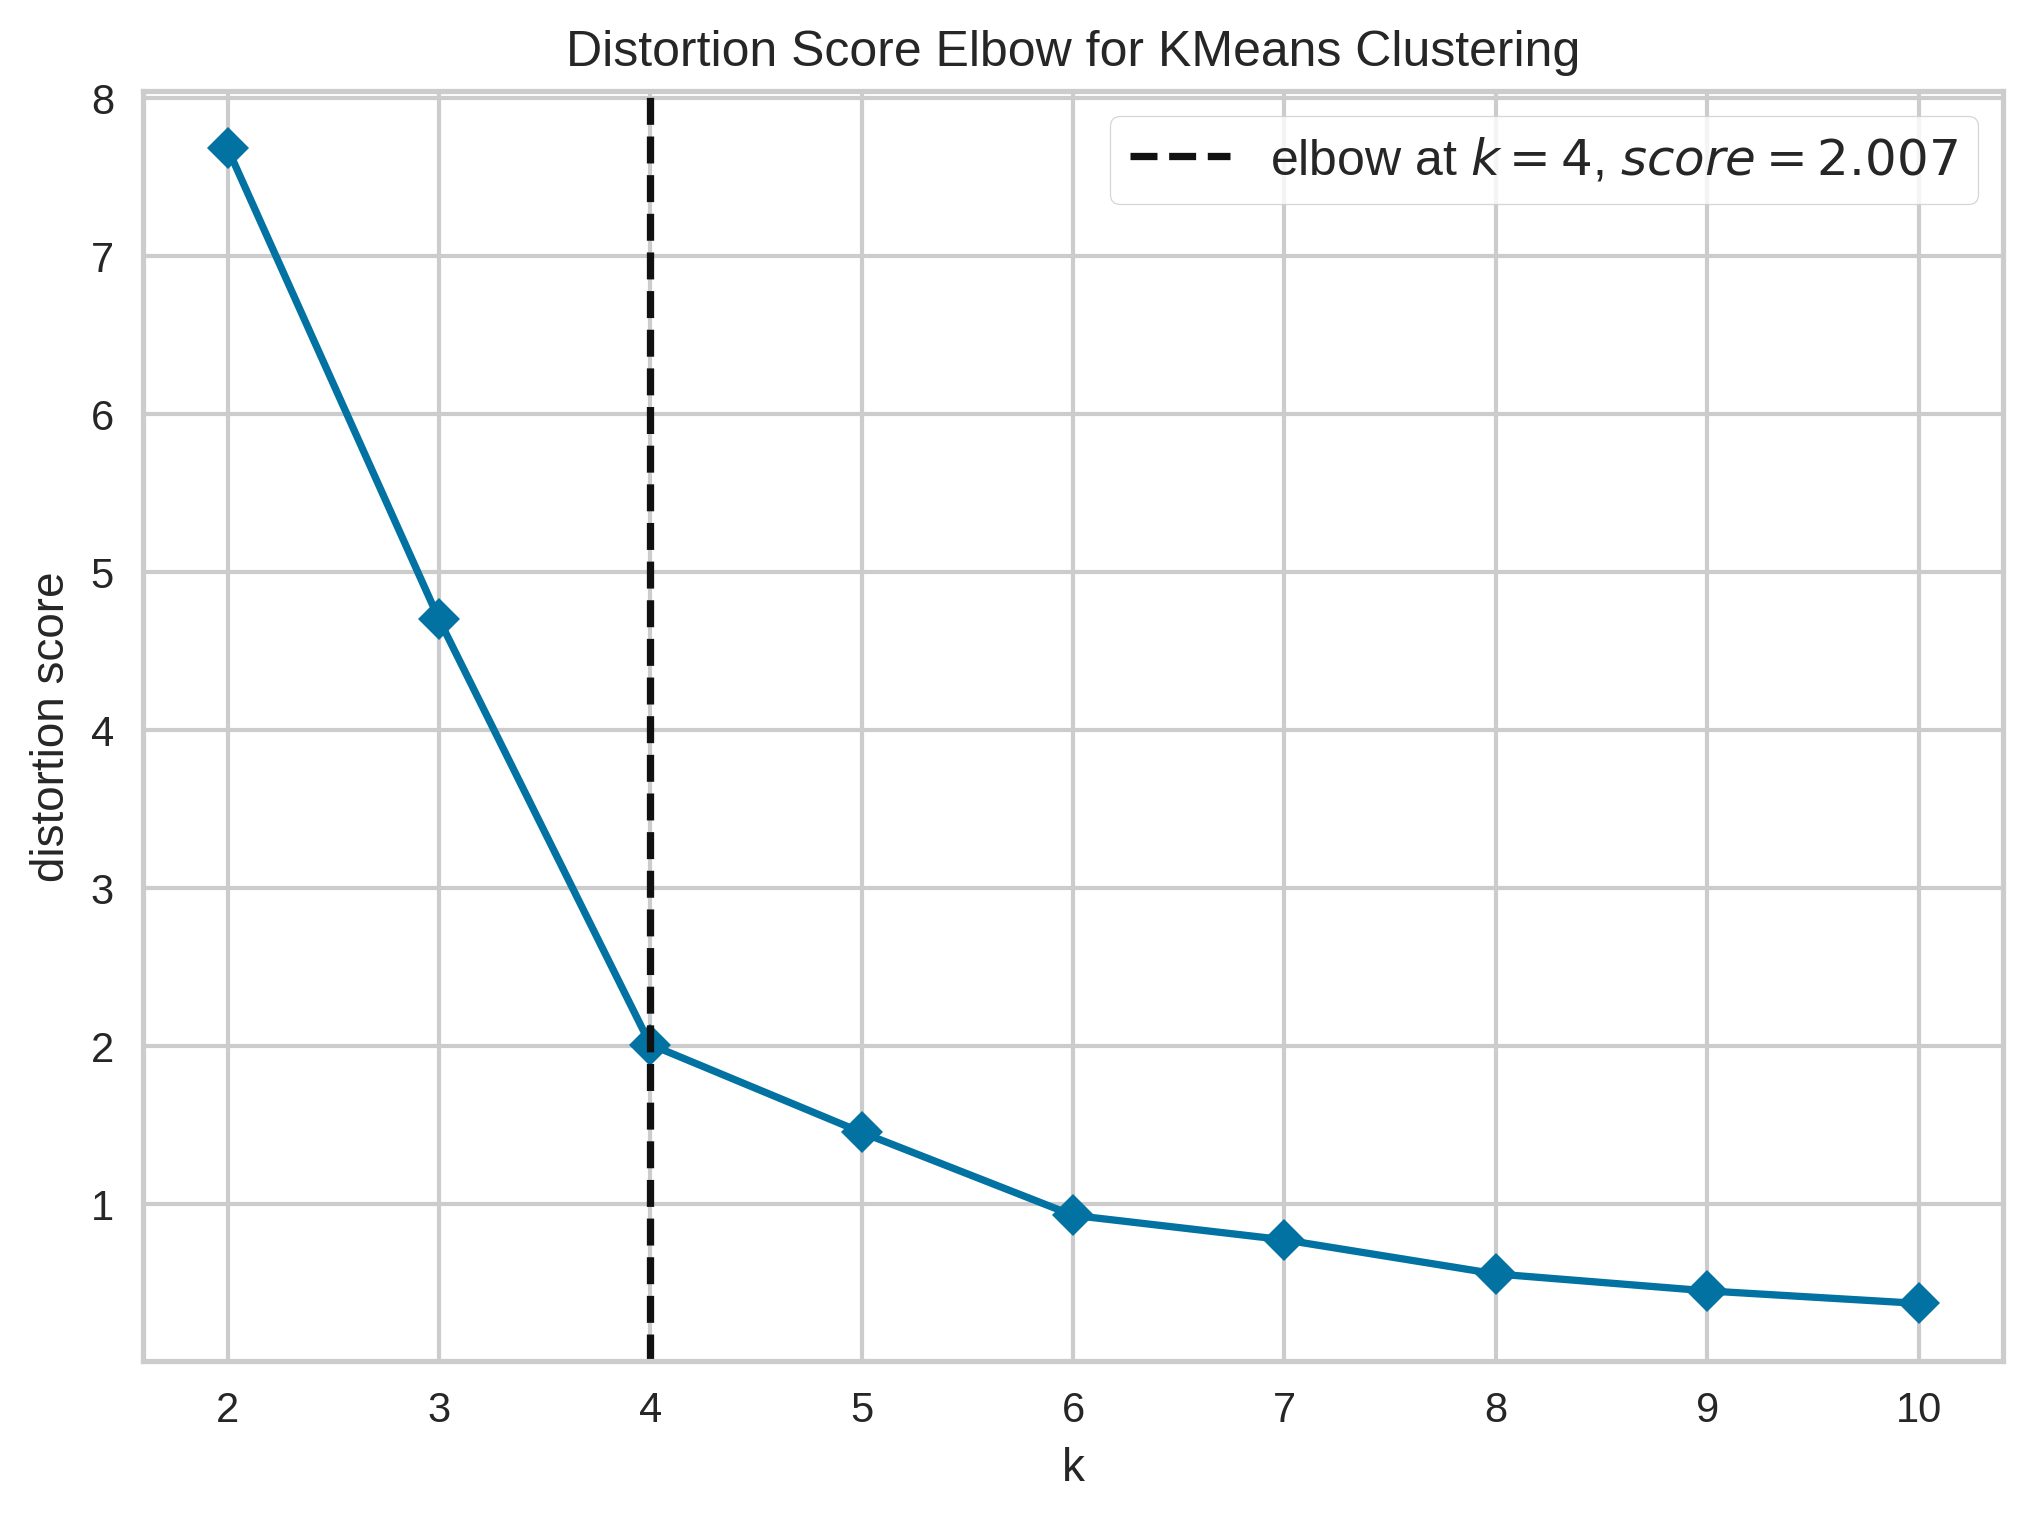

In [9]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [10]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [11]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-silhouette-score')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6773,18645.4915,0.4897,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.528213,Cluster 0
1,0.522891,Cluster 0
2,0.522891,Cluster 0
3,0.522891,Cluster 0
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.521431,Cluster 0
7,0.519894,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


In [12]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6630,31821.8274,0.4529,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.528213,Cluster 3
1,0.522891,Cluster 0
2,0.522891,Cluster 0
3,0.522891,Cluster 0
4,0.500000,Cluster 0
5,0.500000,Cluster 0
6,0.521431,Cluster 0
7,0.519894,Cluster 0
8,0.500000,Cluster 0
9,0.500000,Cluster 0


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
  # print(f"Cluster {cluster_name}: {cluster_list}")
  print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.5263611674308777 | 0.4748067855834961 | 4520
max, min, total 0.4125291705131531 | 0.33772188425064087 | 1102
max, min, total 0.4746394455432892 | 0.4125470817089081 | 1530
max, min, total 0.6493069529533386 | 0.5263959169387817 | 1390


,HCFAI,Accessibility Level
6056,0.649307,Cluster 3
56,0.641621,Cluster 3
3868,0.639476,Cluster 3
6393,0.638255,Cluster 3
588,0.635990,Cluster 3
...,...,...
5422,0.340345,Cluster 1
5279,0.340345,Cluster 1
5499,0.340260,Cluster 1
5418,0.340221,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(1))

x['ID'] = IDdf
x

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3428519,Malawanit,Magsaysay,Davao del Sur,0.122565,0.677304,1.173487,1.0,0,0,...,68.893753,0.181563,0.083000,2.311039,1.185348,0.601752,0.472064,0.528213,0.528213,1
1,3429892,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,61.011170,1.243660,0.205204,7.772888,3.768296,1.719364,1.660288,0.522891,0.522891,0
2,3429893,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,61.288138,7.151045,1.179923,44.694106,21.667702,9.886343,9.546656,0.522891,0.522891,0
3,3429894,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,61.920335,3.109150,0.513010,19.432220,9.420740,4.298410,4.150720,0.522891,0.522891,0
4,3429897,Bacungan,Magsaysay,Davao del Sur,0.300128,0.683040,1.189840,1.0,0,0,...,64.355550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,3594317,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,58.817893,5.562570,3.230436,42.721222,19.313516,9.155782,7.186424,0.380392,0.380392,0
8538,3594318,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,59.392667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
8539,3595697,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,58.829888,4.562391,2.649587,35.039726,15.840846,7.509525,5.894268,0.380392,0.380392,0
8540,3595698,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,59.122792,5.562570,3.230436,42.721222,19.313516,9.155782,7.186424,0.380392,0.380392,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3428519,Malawanit,Magsaysay,Davao del Sur,0.122565,0.677304,1.173487,1.0,0,0,...,3481009,68.893753,0.181563,0.083000,2.311039,1.185348,0.601752,0.472064,0.528213,1
1,3429892,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,3481009,61.011170,1.243660,0.205204,7.772888,3.768296,1.719364,1.660288,0.522891,0
2,3429893,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,3481009,61.288138,7.151045,1.179923,44.694106,21.667702,9.886343,9.546656,0.522891,0
3,3429894,Maibo,Magsaysay,Davao del Sur,0.229006,0.704151,1.176550,1.0,0,0,...,3481009,61.920335,3.109150,0.513010,19.432220,9.420740,4.298410,4.150720,0.522891,0
4,3429897,Bacungan,Magsaysay,Davao del Sur,0.300128,0.683040,1.189840,1.0,0,0,...,3481009,64.355550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,3594317,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,3544547,58.817893,5.562570,3.230436,42.721222,19.313516,9.155782,7.186424,0.380392,0
8538,3594318,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,3544547,59.392667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
8539,3595697,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,3544547,58.829888,4.562391,2.649587,35.039726,15.840846,7.509525,5.894268,0.380392,0
8540,3595698,Santiago,Caraga,Davao Oriental,0.908802,1.229939,0.852501,0.0,0,0,...,3544547,59.122792,5.562570,3.230436,42.721222,19.313516,9.155782,7.186424,0.380392,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')